# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

1) 필요한 모듈 import하기   

2) 데이터 준비   

3) 데이터 이해하기     


Feature Data 지정하기   
Label Data 지정하기   
Target Names 출력해 보기   
데이터 Describe 해 보기   

4) train, test 데이터 분리   

5) 다양한 모델로 학습시켜보기   

6) 모델을 평가해 보기


==========================================================================================================================================



### 1) 필요한 모듈 import하기 

In [1]:
import sklearn

print(sklearn.__version__)

1.0


In [33]:
import pandas as pd
import pandas
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

### 2~3) 데이터 준비 및 이해하기

In [3]:
# key를 통해 데이터 확인
# KEY를 통해 불러온 손글씨파일을 확인한다.

digits = load_digits() 
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [26]:
# 데이터 Describe 해 보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
# feature를 저장 / Feature Data 지정하기
# 손글씨 데이터에는 64개의 변수(특징)이 있고 총 1797개의 데이터(행)가 있다

digits_data = digits.data
print(digits_data.shape)    # 데이터(손글씨 이미지)의 개수, 이미지당 Pixel 수

(1797, 64)


In [7]:
# feature데이터의 0번째 데이터 숫자 확인
# 이미지 데이터를 숫자로 잘 불러온 모습이다

digits_data[0] # 각 이미지가 64개의 Piexel로 구성된 것을 확인할 수 있습니다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

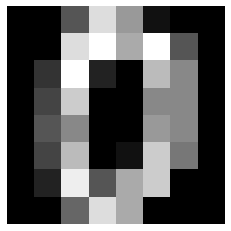

In [16]:
# feature의 모양 확인
# 이미지를 숫자로 불러왔지만 matplotlib을 이용해서 그림모양으로 확인을 한다.
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

데이터가 1797개의 행을 가지고 있으므로 라벨 또한 1797행을 가지고 있다.

In [17]:
# 라벨 저장  / Label Data 지정하기
digits_label = digits.target
print(digits_label.shape)

(1797,)


In [18]:
#라벨이 들어가 있는 모양 확인
digits_label[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

라벨은 0~9의 값을 가진다.

In [19]:
#라벨들의 종류를 확인  / Target Names 출력해 보기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4. train, test 데이터 분리
train test를 분리하여 모델에 적용하기 위해 split을 진행한다.

In [24]:
#train데이터와 test데이터를 위해 split하기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

### 5. 다양한 모델로 학습시켜보기
####  Decision Tree (의사결정나무)

In [63]:
# Decision Tree (의사결정나무)

# 훈련(모델의 적용)
decision_tree = DecisionTreeClassifier(random_state=32) 
# 훈련
decision_tree.fit(X_train, y_train)
# 예측
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.
# 분석결과 확인
print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.
# 오차행렬인 컴퓨전 메트릭스 확인
decision_matrix = confusion_matrix(y_test, y_pred)
print(decision_matrix)
#정확도 비교해보기
decision_accuracy = accuracy_score(y_test, y_pred)
print('의사결정나무의 정확도 : ',decision_accuracy)

# Random Forest(랜덤포레스트)

# 모델 적용
random_forest = RandomForestClassifier(random_state=32) 
# 훈련
random_forest.fit(X_train, y_train) 
# 예측
y_pred = random_forest.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
random_matrix = confusion_matrix(y_test, y_pred)
print(random_matrix)
#정확도 비교해보기
random_accuracy = accuracy_score(y_test, y_pred)
print('랜덤포레스트의 정확도 : ',random_accuracy)

# SVM

# 모델 적용
svm_model = svm.SVC() 
# 훈련
svm_model.fit(X_train, y_train)  
# 예측
y_pred = svm_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
svm_matrix = confusion_matrix(y_test, y_pred)
print(svm_matrix)
#정확도 비교해보기
svm_accuracy = accuracy_score(y_test, y_pred)
print('SVM의 정확도 : ',svm_accuracy)

#SGD Classifier

# 모델 적용
sgd_model = SGDClassifier()
# 훈련
sgd_model.fit(X_train, y_train)    
# 예측
y_pred = sgd_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
sgd_matrix = confusion_matrix(y_test, y_pred)
print(sgd_matrix)
# 정확도 비교하기
sgd_accuracy = accuracy_score(y_test, y_pred)
print("sgd의 정확도: ", sgd_accuracy)

# Logistic Regression

# 모델 적용
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)   
# 예측
y_pred = logistic_model.predict(X_test)
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
logistic_matrix = confusion_matrix(y_test, y_pred)
print(logistic_matrix)
# 정확도 비교하기
logistic_accuracy = accuracy_score(y_test, y_pred)
print('LogisticRegression의 정확도 : ',logistic_accuracy)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[38  4]
 [ 3 69]]
의사결정나무의 정확도 :  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  4]
 [ 1 71]]
랜덤포레스트의 정확도 :  0.956140350877193
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print('의사결정나무의 정확도 : ',decision_accuracy)
print('랜덤포레스트의 정확도 : ',random_accuracy)
print('SVM의 정확도 : ',svm_accuracy)
print('sgd의 정확도 : ',sgd_accuracy)
print('LogisticRegression의 정확도 : ',logistic_accuracy)

의사결정나무의 정확도 :  0.9385964912280702
랜덤포레스트의 정확도 :  0.956140350877193
SVM의 정확도 :  0.9035087719298246
sgd의 정확도 :  0.9385964912280702
LogisticRegression의 정확도 :  0.9473684210526315


## 6) 모델평가

각 모델들의 정확도를 비교해 보니 랜덤포레스트가 가장 좋은 성능을 보인다고 알고 있는데 랜덤포레스트가 잘 분류했다고 나왔다. 

==========================================================================================================================================
# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

1) 필요한 모듈 import하기

2) 데이터 준비

3) 데이터 이해하기

Feature Data 지정하기   
Label Data 지정하기   
Target Names 출력해 보기   
데이터 Describe 해 보기   

4) train, test 데이터 분리

5) 다양한 모델로 학습시켜보기

6) 모델을 평가해 보기

==========================================================================================================================================

In [4]:
# 와인데이터를 로드한다 그 다음 key를 통해 데이터 확인
wine = load_wine() 
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [5]:
# 데이터 Describe 해 보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# 와인데이터에서 feature로 되어있는 데이터를 가져온다.
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [7]:
# 와인데이터에서 feature로 되어있는 데이터를 가져온다.
wine_data = wine.data
print(wine_data.shape)

In [44]:
#feature데이터의 0번째 데이터의 숫자 확인
wine_data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [8]:
# 라벨 저장  / Label Data 지정하기
wine_label = wine.target
print(wine_label.shape)

(178,)


In [9]:
#라벨이 들어가 있는 모양 확인
wine_label[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
#라벨들의 종류를 확인  / Target Names 출력해 보기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### train, test 데이터 분리

In [20]:
#train데이터롸 test데이터를 위해 split하기
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [65]:
# Decision Tree (의사결정나무)

# 훈련(모델의 적용)
decision_tree = DecisionTreeClassifier(random_state=32) 
# 훈련
decision_tree.fit(X_train, y_train)
# 예측
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.
# 분석결과 확인
print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.
# 오차행렬인 컴퓨전 메트릭스 확인
decision_matrix = confusion_matrix(y_test, y_pred)
print(decision_matrix)
#정확도 비교해보기
decision_accuracy = accuracy_score(y_test, y_pred)
print('의사결정나무의 정확도 : ',decision_accuracy)

# Random Forest(랜덤포레스트)

# 모델 적용
random_forest = RandomForestClassifier(random_state=32) 
# 훈련
random_forest.fit(X_train, y_train) 
# 예측
y_pred = random_forest.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
random_matrix = confusion_matrix(y_test, y_pred)
print(random_matrix)
#정확도 비교해보기
random_accuracy = accuracy_score(y_test, y_pred)
print('랜덤포레스트의 정확도 : ',random_accuracy)

# SVM

# 모델 적용
svm_model = svm.SVC() 
# 훈련
svm_model.fit(X_train, y_train)  
# 예측
y_pred = svm_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
svm_matrix = confusion_matrix(y_test, y_pred)
print(svm_matrix)
#정확도 비교해보기
svm_accuracy = accuracy_score(y_test, y_pred)
print('SVM의 정확도 : ',svm_accuracy)

#SGD Classifier

# 모델 적용
sgd_model = SGDClassifier()
# 훈련
sgd_model.fit(X_train, y_train)    
# 예측
y_pred = sgd_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
sgd_matrix = confusion_matrix(y_test, y_pred)
print(sgd_matrix)
# 정확도 비교하기
sgd_accuracy = accuracy_score(y_test, y_pred)
print("sgd의 정확도: ", sgd_accuracy)

# Logistic Regression

# 모델 적용
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)   
# 예측
y_pred = logistic_model.predict(X_test)
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
logistic_matrix = confusion_matrix(y_test, y_pred)
print(logistic_matrix)
# 정확도 비교하기
logistic_accuracy = accuracy_score(y_test, y_pred)
print('LogisticRegression의 정확도 : ',logistic_accuracy)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[38  4]
 [ 3 69]]
의사결정나무의 정확도 :  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  4]
 [ 1 71]]
랜덤포레스트의 정확도 :  0.956140350877193
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg       0.93

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print('의사결정나무의 정확도 : ',decision_accuracy)
print('랜덤포레스트의 정확도 : ',random_accuracy)
print('SVM의 정확도 : ',svm_accuracy)
print('sgd의 정확도 : ',sgd_accuracy)
print('LogisticRegression의 정확도 : ',logistic_accuracy)

의사결정나무의 정확도 :  0.9385964912280702
랜덤포레스트의 정확도 :  0.956140350877193
SVM의 정확도 :  0.9035087719298246
sgd의 정확도 :  0.8245614035087719
LogisticRegression의 정확도 :  0.9473684210526315


## 6) 모델평가

분류문제에서는 랜덤포레스트가 좋은 성능을 보이고 있다. 의사결정 나무를 다수 생성하고 class를 분류하는 것이 wine데이터에서는 긍정적인 성능을 보이는 것 같다.

==========================================================================================================================================
# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다.

1) 필요한 모듈 import하기

2) 데이터 준비

3) 데이터 이해하기

Feature Data 지정하기   
Label Data 지정하기   
Target Names 출력해 보기   
데이터 Describe 해 보기   

4) train, test 데이터 분리

5) 다양한 모델로 학습시켜보기

6) 모델을 평가해 보기

==========================================================================================================================================

In [35]:
# 암데이터를 로드한다 그 다음 key를 통해 데이터 확인
breast_cancer = load_breast_cancer() 
print(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [36]:
# 데이터 Describe 해 보기
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
# 암 데이터에서 feature로 되어있는 데이터를 가져온다.
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


유방암 데이터에는 30개의 변수(특징)이 있고 총 569개의 데이터(행)가 있다.

In [38]:
# 라벨 저장  / Label Data 지정하기
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)

(569,)


In [39]:
#라벨이 들어가 있는 모양 확인
breast_cancer_label[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [43]:
#feature데이터의 0번째 데이터의 숫자 확인
breast_cancer_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [40]:
#라벨들의 종류를 확인  / Target Names 출력해 보기
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

라벨은 2가지 종류가 있다. 여기서는 암이 있다, 없다로 분류 한다

노드를 진행하면서 나온 퀴즈이다. 
암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안 된다. 즉 양성을 음성으로 판단하면 안 되기 때문에 Recall이 더 중요하다. 라는 답안을 참고하자

### train, test 데이터 분리

In [45]:
#train데이터롸 test데이터를 위해 split하기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [49]:
# 훈련(모델의 적용)
decision_tree = DecisionTreeClassifier(random_state=32) 
# 훈련
decision_tree.fit(X_train, y_train)
# 예측
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.
# 분석결과 확인
print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.
# 오차행렬인 컴퓨전 메트릭스 확인
decision_matrix = confusion_matrix(y_test, y_pred)
print(decision_matrix)
#recall 비교해보기
decision_recall=decision_matrix[0][0]/(decision_matrix[0][0]+decision_matrix[0][1])
print('의사결정나무의 recall값 : ',decision_recall)


# 모델 적용
random_forest = RandomForestClassifier(random_state=32) 
# 훈련
random_forest.fit(X_train, y_train) 
# 예측
y_pred = random_forest.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
random_matrix = confusion_matrix(y_test, y_pred)
print(random_matrix)
#recall값 구하기
random_recall=random_matrix[0][0]/(random_matrix[0][0]+random_matrix[0][1])
print('랜덤 포레스트의 recall값 : ',random_recall)


# 모델 적용
svm_model = svm.SVC() 
# 훈련
svm_model.fit(X_train, y_train)  
# 예측
y_pred = svm_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
svm_matrix = confusion_matrix(y_test, y_pred)
print(svm_matrix)
#recall값 구하기
svm_recall=svm_matrix[0][0]/(svm_matrix[0][0]+svm_matrix[0][1])
print('SVM의 recall값 : ',svm_recall)



# 모델 적용
sgd_model = SGDClassifier()
# 훈련
sgd_model.fit(X_train, y_train)    
# 예측
y_pred = sgd_model.predict(X_test) 
# 분석 결과 확인
print(classification_report(y_test, y_pred)) 
# 오차행렬인 컴퓨전 메트릭스 확인
sgd_matrix = confusion_matrix(y_test, y_pred)
print(sgd_matrix)
#recall값 구하기
sgd_recall=sgd_matrix[0][0]/(sgd_matrix[0][0]+sgd_matrix[0][1])
print('SGD의 recall값 : ',sgd_recall)


# 모델 적용
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)   
# 예측
y_pred = logistic_model.predict(X_test)
# 분석 결과 확인
print(classification_report(y_test, y_pred))
# 오차행렬인 컴퓨전 메트릭스 확인
logistic_matrix = confusion_matrix(y_test, y_pred)
print(logistic_matrix)
#recall값 구하기
logistic_recall=logistic_matrix[0][0]/(logistic_matrix[0][0]+logistic_matrix[0][1])
print('로지스틱의 recall값 : ',logistic_recall)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

[[38  4]
 [ 3 69]]
의사결정나무의 recall값 :  0.9047619047619048
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  4]
 [ 1 71]]
랜덤 포레스트의 recall값 :  0.9047619047619048
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        42
           1       0.87      1.00      0.93        72

    accuracy                           0.90       114
   macro avg 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print('의사결정나무의 recall값 : ',decision_recall)
print('랜덤포레스트의 recall값 : ',random_recall)
print('SVM의 recall값 : ',svm_recall)
print('sgd의 recall값 : ',sgd_recall)
print('LogisticRegression의 recall값 : ',logistic_recall)

의사결정나무의 recall값 :  0.9047619047619048
랜덤포레스트의 recall값 :  0.9047619047619048
SVM의 recall값 :  0.7380952380952381
sgd의 recall값 :  0.7142857142857143
LogisticRegression의 recall값 :  0.9047619047619048


## 6. 모델평가

의사결정나무, 랜텀포레스트, 로지스틱리그레이션 이 비교적 높은 값이 나왔고, SVM과 SGD은 낮은 값이 나왔다. 전체적인 정답률을 줄여서라도 양성을 음성으로 판단하는 확률을 0으로 만들어 recall값을 높게해야 한다. 그래야 암인데 잘못 판단하여 치료 시기를 놓치는 안타까운 일이 일어나지 않을것이다.